We're going to check the quality of the a new data set...

Download the data file from `/home/data/kelleher/MotorInsuranceFraudClaimABTFull.csv`

In [2]:
import os, sys
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/home/data/kelleher/MotorInsuranceFraudClaimABTFull.csv')
df.head()

,ID,Insurance Type,Income of Policy Holder,Marital Status,Num Claimants,Injury Type,Overnight Hospital Stay,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
0,1,CI,0,NaN,2,Soft Tissue,No,1625,3250,2,2.0,1.0,0,1
1,2,CI,0,NaN,2,Back,Yes,15028,60112,1,0.0,0.0,15028,0
2,3,CI,54613,Married,1,Broken Limb,No,-99999,0,0,0.0,0.0,572,0
3,4,CI,0,NaN,3,Serious,Yes,270200,0,0,0.0,0.0,270200,0
4,5,CI,0,NaN,4,Soft Tissue,No,8869,0,0,0.0,0.0,0,1


In [4]:
df.shape

(500, 14)

In [6]:
df.dtypes

ID                           int64
Insurance Type              object
Income of Policy Holder      int64
Marital Status              object
Num Claimants                int64
Injury Type                 object
Overnight Hospital Stay     object
Claim Amount                 int64
Total Claimed                int64
Num Claims                   int64
Num Soft Tissue            float64
% Soft Tissue              float64
Claim Amount Received        int64
Fraud Flag                   int64
dtype: object

In [7]:
df.ID[:10]

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: ID, dtype: int64

In [9]:
df.ID.min(), df.ID.max()

(1, 500)

In [11]:
df.ID.unique().shape

(500,)

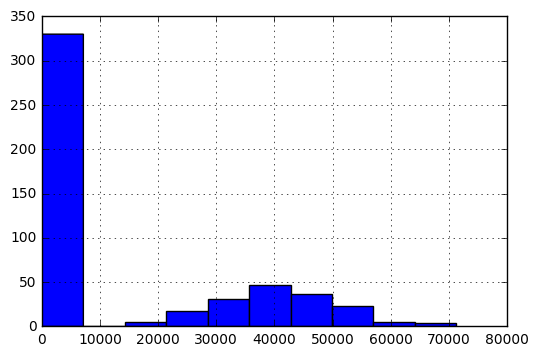

In [12]:
df['Income of Policy Holder'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7626490>]], dtype=object)

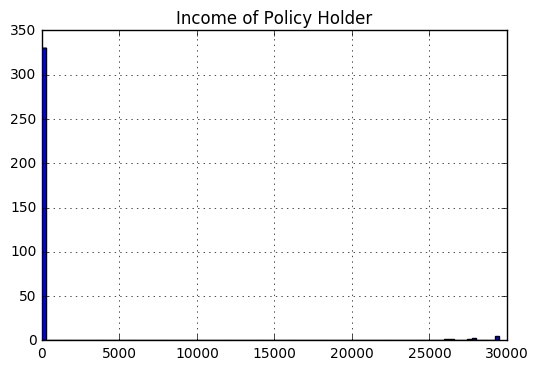

In [18]:
df[df['Income of Policy Holder']<30000][['Income of Policy Holder']].hist(bins=100)

In [20]:
df[df['Income of Policy Holder']<10000].shape, df[df['Income of Policy Holder']==0].shape

((330, 14), (330, 14))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ee7310>]], dtype=object)

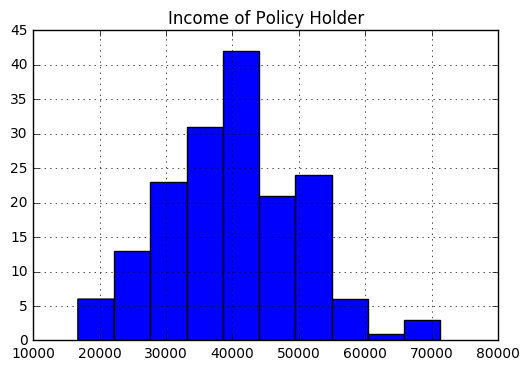

In [22]:
df[df['Income of Policy Holder']>0][['Income of Policy Holder']].hist(bins=10)

In [26]:
df.loc[df['Income of Policy Holder']==0, 'Income of Policy Holder'] = np.nan

In [28]:
df['Income of Policy Holder'].mean()

40411.74705882353

In [29]:
df['Income of Policy Holder'].median()

40455.0

In [30]:
df.describe()

,ID,Income of Policy Holder,Num Claimants,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
count,500.000000,170.000000,500.000000,500.00000,500.00000,500.000000,490.000000,500.000000,500.000000,500.000000
mean,250.500000,40411.747059,1.908000,16373.20400,9597.18600,0.798000,0.234694,0.172012,13051.942000,0.336000
std,144.481833,10319.138946,1.012713,29426.27696,35655.68622,2.666724,0.589635,0.428015,30547.194864,0.472812
min,1.000000,16730.000000,1.000000,-99999.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.750000,33552.750000,1.000000,3322.25000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,250.500000,40455.000000,2.000000,5663.00000,0.00000,0.000000,0.000000,0.000000,3253.500000,0.000000
75%,375.250000,46913.500000,3.000000,12245.50000,11282.75000,1.000000,0.000000,0.000000,8191.750000,1.000000
max,500.000000,71284.000000,4.000000,270200.00000,729792.00000,56.000000,5.000000,2.000000,295303.000000,1.000000


In [31]:
df.head()

,ID,Insurance Type,Income of Policy Holder,Marital Status,Num Claimants,Injury Type,Overnight Hospital Stay,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
0,1,CI,NaN,NaN,2,Soft Tissue,No,1625,3250,2,2.0,1.0,0,1
1,2,CI,NaN,NaN,2,Back,Yes,15028,60112,1,0.0,0.0,15028,0
2,3,CI,54613.0,Married,1,Broken Limb,No,-99999,0,0,0.0,0.0,572,0
3,4,CI,NaN,NaN,3,Serious,Yes,270200,0,0,0.0,0.0,270200,0
4,5,CI,NaN,NaN,4,Soft Tissue,No,8869,0,0,0.0,0.0,0,1


In [39]:
(1.0-1.0*df.dropna().shape[0]/df.shape[0])

0.6659999999999999

In [44]:
df[df['Income of Policy Holder'] == np.nan].shape

(0, 14)

In [47]:
df[~ np.isnan(df['Income of Policy Holder'])].shape

(170, 14)

In [48]:
df.dropna(subset=['Income of Policy Holder'])

,ID,Insurance Type,Income of Policy Holder,Marital Status,Num Claimants,Injury Type,Overnight Hospital Stay,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
2,3,CI,54613.0,Married,1,Broken Limb,No,-99999,0,0,0.0,0.000000,572,0
6,7,CI,52567.0,Single,3,Broken Limb,No,3017,18102,2,1.0,0.500000,0,1
9,10,CI,42300.0,Married,4,Back,No,2260,0,0,0.0,0.000000,2260,0
14,15,CI,50654.0,Married,2,Soft Tissue,No,1893,5679,4,3.0,0.750000,0,1
18,19,CI,37435.0,Divorced,2,Back,No,3071,6142,2,0.0,0.000000,3071,0
27,28,CI,38179.0,Single,2,Back,No,5212,10424,1,0.0,0.000000,5212,0
35,36,CI,42239.0,Divorced,3,Soft Tissue,No,74365,0,0,0.0,0.000000,0,1
37,38,CI,37001.0,Married,2,Broken Limb,No,3649,0,0,0.0,0.000000,3649,0
39,40,CI,48898.0,Married,1,Back,No,10650,0,0,0.0,0.000000,0,1
40,41,CI,35139.0,Married,2,Broken Limb,No,3873,17578,1,0.0,0.000000,3873,0


In [51]:
df.groupby('Insurance Type ').ID.count()

Insurance Type 
CI    500
Name: ID, dtype: int64

In [ ]:
df.groupby('Insurance Type ').ID.count()

In [57]:
df.groupby('Injury Type').ID.count().sort_values(ascending=False)

Injury Type
Broken Limb    177
Soft Tissue    172
Back           116
Serious         35
Name: ID, dtype: int64

In [58]:
df.columns

Index([u'ID', u'Insurance Type ', u'Income of Policy Holder',
       u'Marital Status', u'Num Claimants', u'Injury Type',
       u'Overnight Hospital Stay', u'Claim Amount', u'Total Claimed',
       u'Num Claims', u'Num Soft Tissue', u'% Soft Tissue',
       u'Claim Amount Received', u'Fraud Flag'],
      dtype='object')

In [59]:
df.describe()

,ID,Income of Policy Holder,Num Claimants,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
count,500.000000,170.000000,500.000000,500.00000,500.00000,500.000000,490.000000,500.000000,500.000000,500.000000
mean,250.500000,40411.747059,1.908000,16373.20400,9597.18600,0.798000,0.234694,0.172012,13051.942000,0.336000
std,144.481833,10319.138946,1.012713,29426.27696,35655.68622,2.666724,0.589635,0.428015,30547.194864,0.472812
min,1.000000,16730.000000,1.000000,-99999.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.750000,33552.750000,1.000000,3322.25000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,250.500000,40455.000000,2.000000,5663.00000,0.00000,0.000000,0.000000,0.000000,3253.500000,0.000000
75%,375.250000,46913.500000,3.000000,12245.50000,11282.75000,1.000000,0.000000,0.000000,8191.750000,1.000000
max,500.000000,71284.000000,4.000000,270200.00000,729792.00000,56.000000,5.000000,2.000000,295303.000000,1.000000


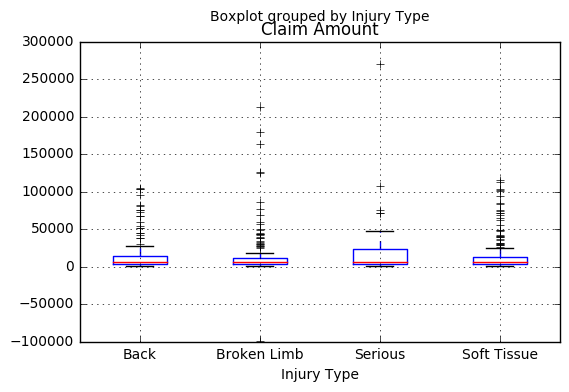

In [60]:
df.boxplot(column='Claim Amount', by='Injury Type')

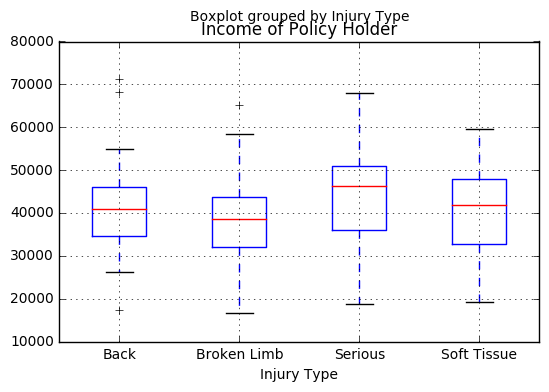

In [61]:
df.boxplot(column='Income of Policy Holder', by='Injury Type')

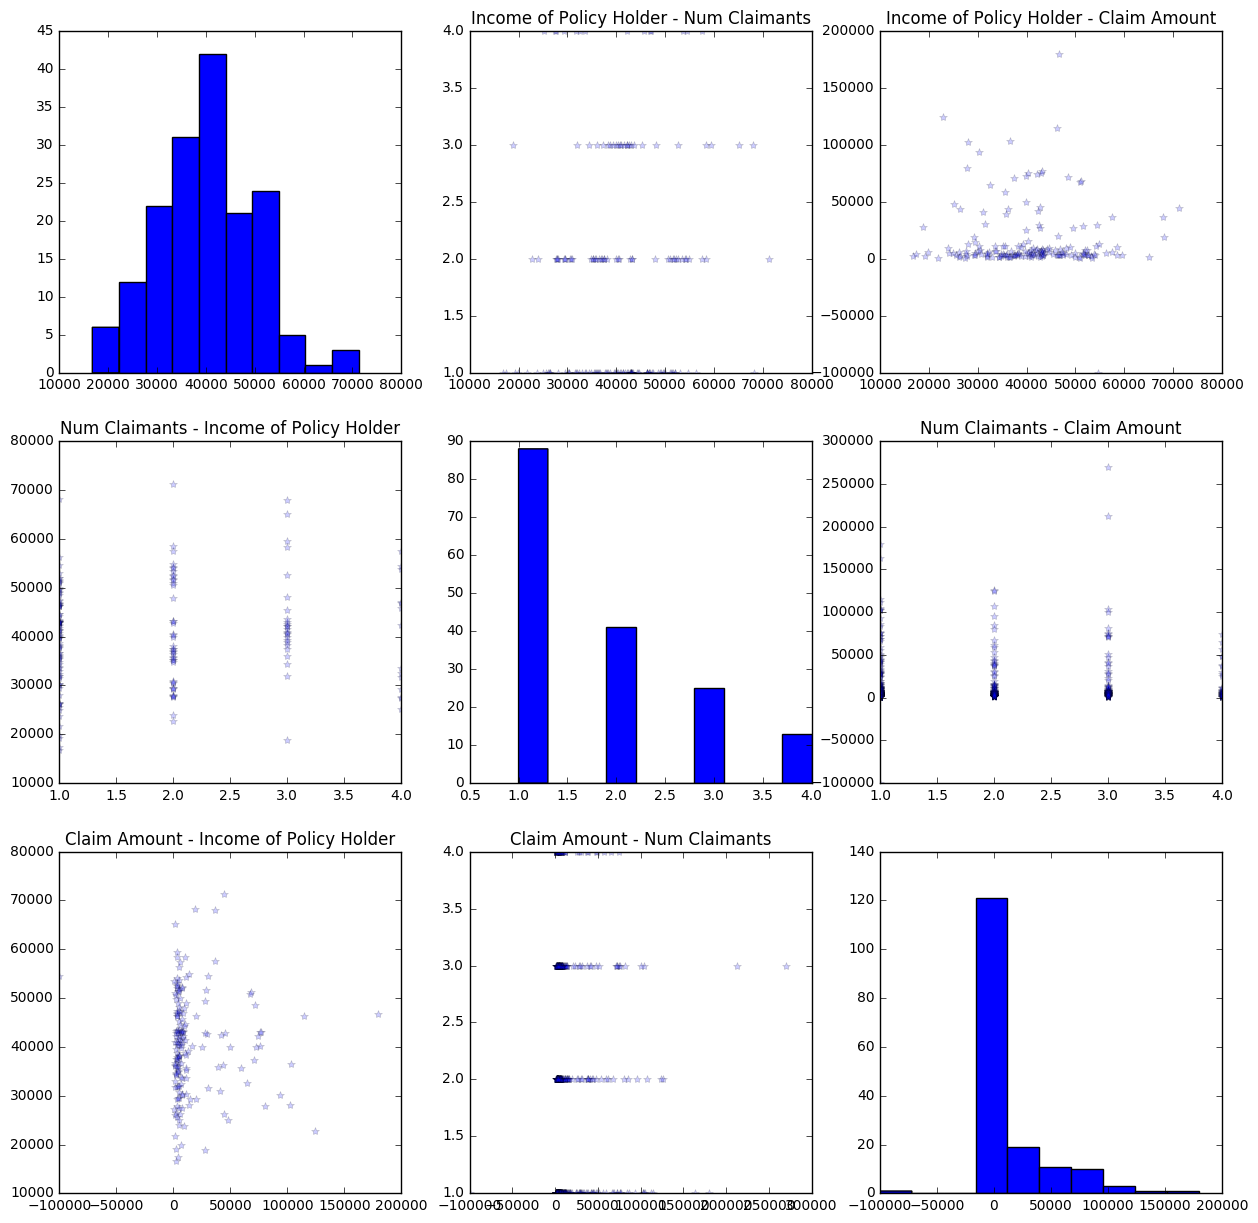

In [84]:
cols = df.describe().columns[1:4]
Ncol = len(cols)
plt.figure(figsize=(15,15))
n = 0
for i in cols:
    for j in cols:
        n += 1
        if i != j:
            plt.subplot(Ncol, Ncol, n)
            plt.plot(df[i], df[j], '*', alpha=0.2)
            plt.title('%s - %s'%(i, j))
        else:
            plt.subplot(Ncol, Ncol, n)
            plt.hist(df.dropna()[j])
plt.show()